In [ ]:
import os


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"


In [ ]:
!kaggle datasets download -d CooperUnion/cardataset

  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 33.2MB/s]


In [ ]:
!cd drive/MyDrive/kaggle

In [ ]:
!kaggle datasets download -d CooperUnion/cardataset --force

  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 13.7MB/s]


In [ ]:
!ls


cardataset.zip	data.csv  kaggle.json


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

Make       Model  Year  ... city mpg  Popularity   MSRP
0  BMW  1 Series M  2011  ...       19        3916  46135
1  BMW    1 Series  2011  ...       19        3916  40650
2  BMW    1 Series  2011  ...       20        3916  36350
3  BMW    1 Series  2011  ...       18        3916  29450
4  BMW    1 Series  2011  ...       18        3916  34500

[5 rows x 16 columns]

In [ ]:
 df.columns = df.columns.str.lower().str.replace(' ', '_')
 string_coloumns = list(df.dtypes[df.dtypes == 'object'].index)
 for col in string_coloumns:
   df[col] = df[col].str.lower().str.replace(' ',' ')
   

In [ ]:
string_coloumns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
df.head()

make       model  year  ... city_mpg  popularity   msrp
0  bmw  1 series m  2011  ...       19        3916  46135
1  bmw    1 series  2011  ...       19        3916  40650
2  bmw    1 series  2011  ...       20        3916  36350
3  bmw    1 series  2011  ...       18        3916  29450
4  bmw    1 series  2011  ...       18        3916  34500

[5 rows x 16 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


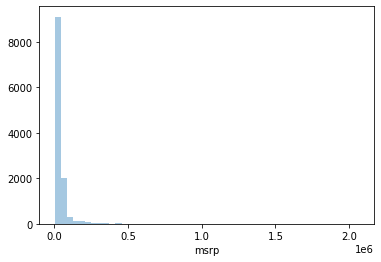

In [ ]:
sns.distplot(df.msrp,kde = False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


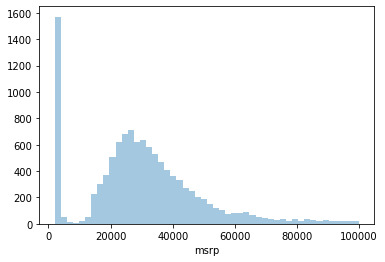

In [ ]:
sns.distplot(df.msrp[df.msrp < 100000]  ,kde = False)

In [ ]:
log_price = np.log1p(df.msrp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


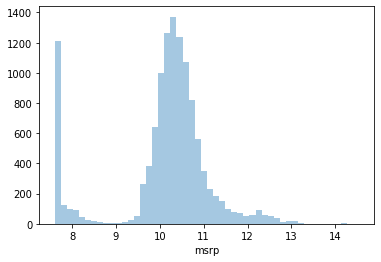

In [ ]:
sns.distplot(log_price, kde=False)

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
n = len(df)

n_test = int(n*0.2)
n_val = int(n*2)
n_train = n - (n_test + n_val)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled[:n_train].copy()
df_val = df_shuffled[n_train:n_train + n_val].copy() 
df_test = df_shuffled[n_train + n_val:].copy()

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

**To avoid accidentally using the target variable later, let’s remove it from the dataframes:**

In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

KeyError: ignored

In [ ]:
/content/result.csv